In [1]:
# Import required packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

In [2]:

# Load the data and check the shape
oecd_bli = pd.read_csv('Linear Model/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('Linear Model/gdp_per_capita.csv', encoding='latin1', na_values='n/a')

print (oecd_bli.shape)
print (gdp_per_capita.shape)
print (oecd_bli.head(3))
print (gdp_per_capita.head(3))

(3292, 17)
(190, 7)
  LOCATION    Country INDICATOR                           Indicator MEASURE  \
0      AUS  Australia   HO_BASE  Dwellings without basic facilities       L   
1      AUT    Austria   HO_BASE  Dwellings without basic facilities       L   
2      BEL    Belgium   HO_BASE  Dwellings without basic facilities       L   

  Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0   Value        TOT      Total        PC  Percentage               0   
1   Value        TOT      Total        PC  Percentage               0   
2   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value Flag Codes  \
0     units                    NaN               NaN    1.1          E   
1     units                    NaN               NaN    1.0        NaN   
2     units                    NaN               NaN    2.0        NaN   

             Flags  
0  Estimated value  
1              NaN  
2         

In [3]:
print (oecd_bli.shape)
print (gdp_per_capita.shape)
print (oecd_bli.head(3))
print (gdp_per_capita.head(3))

(3292, 17)
(190, 7)
  LOCATION    Country INDICATOR                           Indicator MEASURE  \
0      AUS  Australia   HO_BASE  Dwellings without basic facilities       L   
1      AUT    Austria   HO_BASE  Dwellings without basic facilities       L   
2      BEL    Belgium   HO_BASE  Dwellings without basic facilities       L   

  Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0   Value        TOT      Total        PC  Percentage               0   
1   Value        TOT      Total        PC  Percentage               0   
2   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value Flag Codes  \
0     units                    NaN               NaN    1.1          E   
1     units                    NaN               NaN    1.0        NaN   
2     units                    NaN               NaN    2.0        NaN   

             Flags  
0  Estimated value  
1              NaN  
2         

In [4]:
# For simplicity and brevity's sake considering Life expectancy
# as the only factor that determines happiness
oecd_bli = oecd_bli[(oecd_bli['Inequality'] == 'Total') &
                    (oecd_bli['Indicator'] == 'Life expectancy')]
# Prepare the data
combined_data = pd.merge(gdp_per_capita, oecd_bli, on=['Country'])

gdp_value = combined_data[['2015']].copy()
bli_value = combined_data[['Value']].copy()

gdp_value.columns = ['GDP per capita']
bli_value.columns = ['Life satisfaction']

country_stats = pd.concat([gdp_value, bli_value], axis=1)

print (country_stats)

X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

    GDP per capita  Life satisfaction
0        50961.865               82.1
1        43724.031               81.0
2        40106.632               80.5
3         8669.998               73.7
4        43331.961               81.5
5        13340.905               78.9
6        17256.918               78.2
7        52114.165               80.1
8        17288.083               76.5
9        41973.988               80.7
10       37675.006               82.1
11       40996.511               81.0
12       18064.288               80.7
13       12239.894               75.2
14       50854.583               83.0
15       51350.744               81.0
16       35343.336               81.8
17       29866.581               82.3
18       32485.545               83.2
19       27195.197               81.3
20      101994.093               81.5
21        9009.280               74.6
22       43603.115               81.2
23       37044.891               81.5
24       74822.106               81.5
25       124

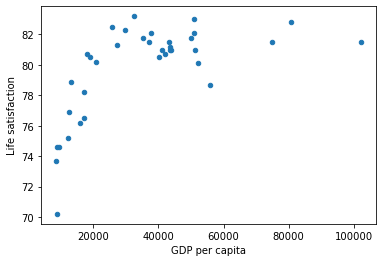

In [5]:
# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [6]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[101994]]

print (model.predict(X_new))

[[85.61047957]]


In [10]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()